# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

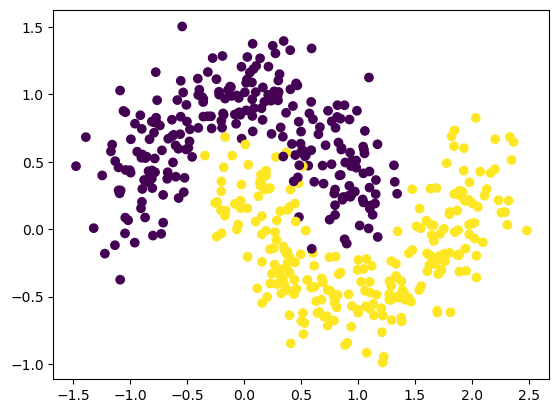

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(moons_points,moons_labels, test_size = 0.2)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400,), (100,))

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn import metrics as skl_metrics

lr = LogisticRegression(penalty='l2', solver='saga', tol=1e-3,max_iter=500) # add some params
svm = SVC(kernel='linear',max_iter=500) # here too



In [6]:
def plot_decisions(models_list, models_names, X, y):
    gs = gridspec.GridSpec(2,2)
    fig = plt.figure(figsize=(10, 8))

    for clf, lab, grd in zip(models_list,
                         models_names,
                         itertools.product([0, 1], repeat=2)):
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title(lab)
    plt.show()
    
def f1(y_test, y_pred):
    f1 = skl_metrics.f1_score(y_test, y_pred,average='weighted')
    return f1

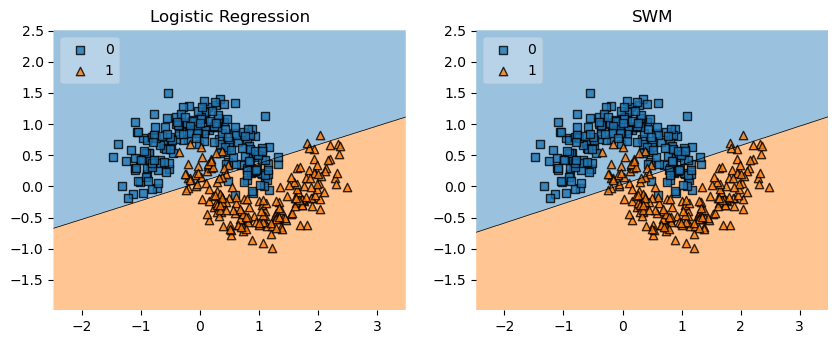

In [7]:
plot_decisions([lr, svm], ['Logistic Regression', 'SWM'], X_train, y_train)

In [8]:
print('f1 on LR: ', f1(y_test, lr.predict(X_test)))
print('f1 on SVM: ', f1(y_test, svm.predict(X_test)))

f1 on LR:  0.8709974424552429
f1 on SVM:  0.8613636363636362


Видимо, svm с линейным ядром работает так же, как логистическая регрессия

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


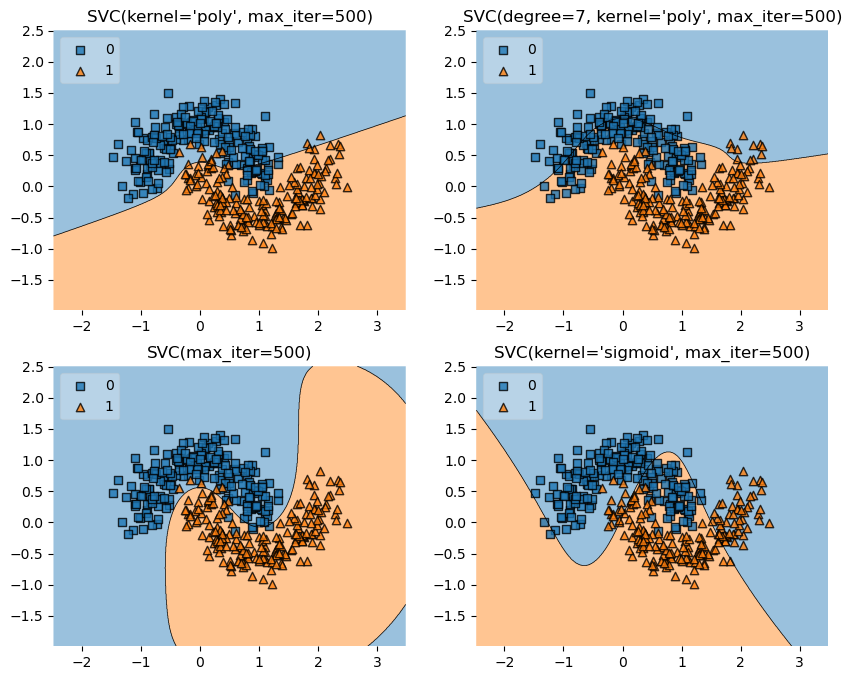

In [9]:
svm_poly_3 = SVC(kernel='poly',max_iter=500)
#svm_poly_5 = SVC(kernel='poly',max_iter=500, degree=5)
svm_poly_7 = SVC(kernel='poly',max_iter=500, degree=7)
#svm_poly_10 = SVC(kernel='poly',max_iter=500, degree=10)
svm_rbf = SVC(kernel='rbf',max_iter=500)
svm_sigmoid = SVC(kernel='sigmoid',max_iter=500)


models = [svm_poly_3, svm_poly_7,  svm_rbf, svm_sigmoid]
labels = [str(i) for i in models]
plot_decisions(models, labels, X_train, y_train)

In [10]:
print('f1 on svm_poly_3: ', f1(y_test, svm_poly_3.predict(X_test)))
print('f1 on svm_poly_7: ', f1(y_test, svm_poly_7.predict(X_test)))
print('f1 on svm_rbf: ', f1(y_test, svm_rbf.predict(X_test)))
print('f1 on svm_sigmoid: ', f1(y_test, svm_sigmoid.predict(X_test)))

f1 on svm_poly_3:  0.9101774042950512
f1 on svm_poly_7:  0.6544901065449011
f1 on svm_rbf:  0.9701575532900832
f1 on svm_sigmoid:  0.6038647342995169


- качество классификации повысилось на poly3 и rbf
- граница перестала быть прямой линией, появились изгибы
- degree - степень полиноминальной функции ядра

я бы выбрала ядро 'rbf' для этой задачи, показывает лучший результат; для SVC степень 3 показала лучшие результаты, чем 7 

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [18]:
y_test.shape, y_train.shape, X_test_poly.shape, X_test.shape

((100,), (400,), (100, 10), (100, 2))

In [19]:
lr = LogisticRegression(penalty='l2', solver='saga', tol=1e-3,max_iter=500) # add some params
svm = SVC(kernel='linear',max_iter=500) # here too

lr.fit(X_train_poly, y_train)
svm.fit(X_train_poly, y_train)

#plot_decisions([lr, svm], ['Logistic Regression', 'SWM'], X_train_poly, y_train)
print('f1 on LR: ', f1(y_test, lr.predict(X_test_poly)))
print('f1 on SVM: ', f1(y_test, svm.predict(X_test_poly)))

f1 on LR:  0.9701575532900832
f1 on SVM:  0.9800744109136006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Качество предсказаний повысилось.
С помощью Mlxtend decision plotting имеет смысл строить графики только для 2х признаков, если больше, каждый последующему дается некоторое константное значение.
Использованная степень для фичей - 3, из 2 фичей получилось 10 таким преобразованием.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

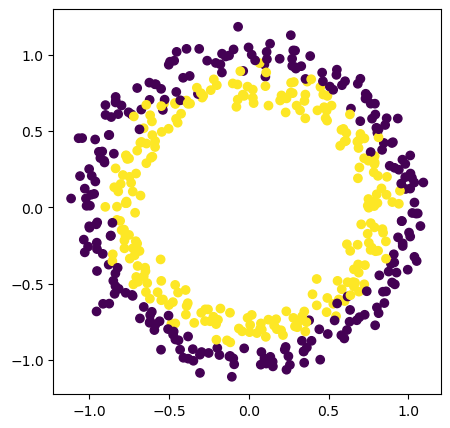

In [20]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

In [21]:
X_train_circ, X_test_circ, y_train_circ, y_test_circ = train_test_split(circles_points,circles_labels, test_size = 0.2)

And even more:

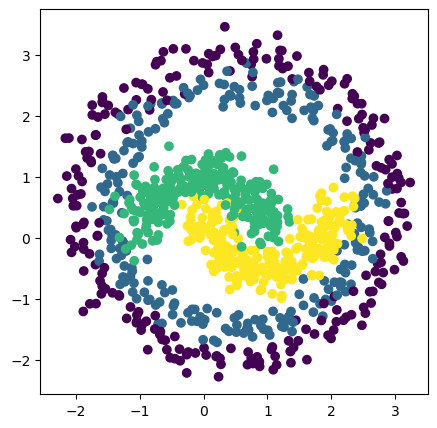

In [22]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

In [23]:
X_train_circ2, X_test_circ2, y_train_circ2, y_test_circ2 = train_test_split(points,labels, test_size = 0.2)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

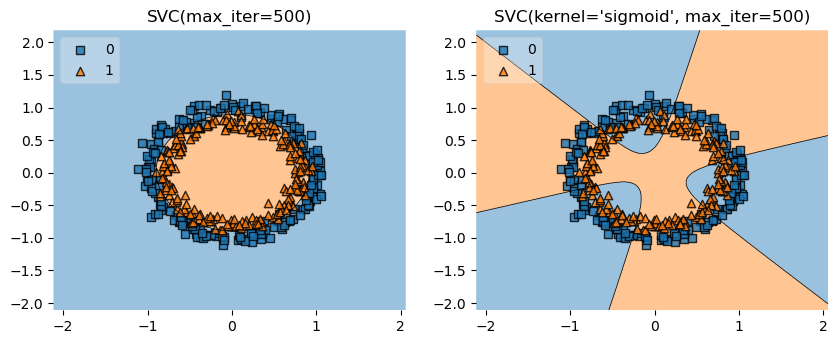

In [24]:
svm_rbf = SVC(kernel='rbf',max_iter=500)
svm_sigmoid = SVC(kernel='sigmoid',max_iter=500)


models = [ svm_rbf, svm_sigmoid]
labels = [str(i) for i in models]
plot_decisions(models, labels, X_train_circ, y_train_circ)

In [25]:
print('f1 on rbf: ', f1(y_test_circ, svm_rbf.predict(X_test_circ)))
print('f1 on sigmoid: ', f1(y_test_circ, svm_sigmoid.predict(X_test_circ)))

f1 on rbf:  0.91000900090009
f1 on sigmoid:  0.4867711787760024


C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


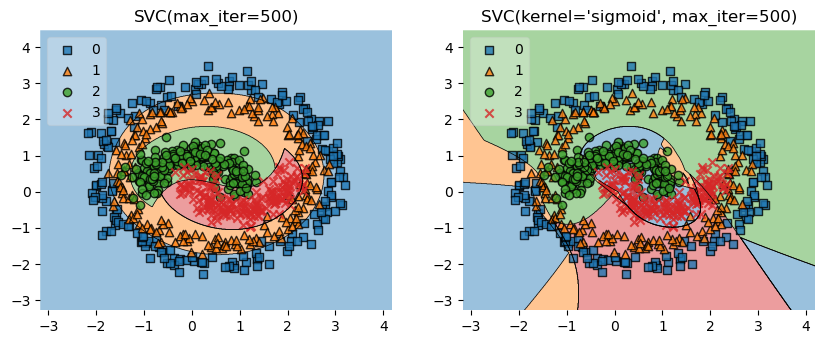

f1 on rbf:  0.9154633871875252
f1 on sigmoid:  0.0603826277082091


In [26]:
svm_rbf = SVC(kernel='rbf',max_iter=500)
svm_sigmoid = SVC(kernel='sigmoid',max_iter=500)


models = [ svm_rbf, svm_sigmoid]
labels = [str(i) for i in models]
plot_decisions(models, labels, X_train_circ2, y_train_circ2)
print('f1 on rbf: ', f1(y_test_circ2, svm_rbf.predict(X_test_circ2)))
print('f1 on sigmoid: ', f1(y_test_circ2, svm_sigmoid.predict(X_test_circ2)))

Вывод:
ядро rbf лучше всего подходит для решения задачи классификации таких данных!